# MNIST Digit Classification
We will be training a CNN to classify images of handwritten digits from the MNIST dataset. Then, we will use this on our own handwritten digits.

First, let's import some libraries

In [1]:
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing dataset

The MNIST dataset is built into Keras. From the documentation [here](https://keras.io/api/datasets/mnist/), we can get some important info. The MNIST dataset is:
> a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

Internally, the dataset is stored as numpy array files.

The pixel values of each image range from 0 to 255, so we will have to scale it to `[0,1]` to normalize.

Additionally, since the images are grayscale, we should reshape the data to have a single colour channel

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1) # the shape of a single image is (height, width, num of channels)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,) # a NumPy array of digit labels (0-9)
assert y_test.shape == (10000,) # a NumPy array of digit labels (0-9)

# Reshape image for single colour channel
# Change images to have shape (28, 28, 1) instead of (28,28), by appending a dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "training samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices (a.k.a one-hot encoded)
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 test samples


Let's also view some of the images

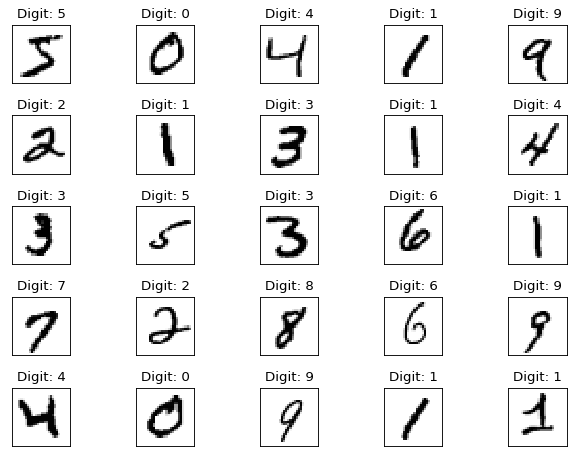

In [3]:
fig = plt.figure(figsize=(8, 6), dpi=80)
# plot first few images 
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    # plot raw pixel data
    plt.imshow(x_train[i], cmap='gray_r', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

## Model definition
Next, let's define the CNN model using Keras' sequential API

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
    #TODO add dropout, batch normalization
)

model.summary()
#TODO: plot model summary
#TODO add callback for model checkpoint, learning rate scheduler
#TODO: look at my ML course notes

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Training
Now, training the model for 15 epochs

In [5]:
batch_size = 128
epochs = 2 # 15
history = model.fit(x_train, y_train_ohe, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 33s 77ms/step - loss: 0.6979 - accuracy: 0.7792 - val_loss: 0.0640 - val_accuracy: 0.9830
Epoch 2/2
422/422 [==============================] - 35s 83ms/step - loss: 0.1092 - accuracy: 0.9661 - val_loss: 0.0520 - val_accuracy: 0.9857


# Evaluate

In [6]:
score = model.evaluate(x_test, y_test_ohe, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.052616186439991
Test accuracy: 0.9840999841690063


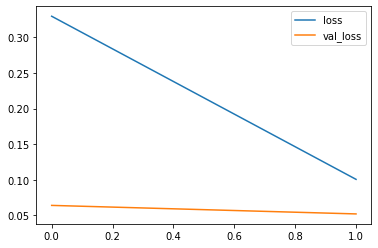

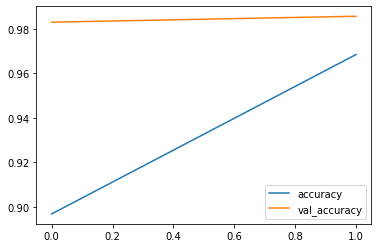

In [7]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

In [8]:
#TODO: use model.predict() on our own image